In [1]:
import pandas as pd
import requests
import shutil
import datetime
import ddddocr
from IPython.display import Image
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
from tqdm import tqdm

import matplotlib
matplotlib.rc('font', family='Microsoft JhengHei')
matplotlib.rcParams['axes.unicode_minus']=False

In [2]:
driver = webdriver.Chrome()

In [18]:
driver.get('https://www.lme.com/Metals/Ferrous/LME-Steel-Scrap-CFR-Turkey-Platts#Trading+day+summary')
output = driver.find_elements(By.XPATH, '//*[@id="dataset-tab-0"]/div/div[2]/div[2]/div/div/div[1]/table/tbody')[0].text.split()
results = []
for i in range(0,len(output),3):
    price_time = f'{output[i+0]} {output[i+1]}'
    price = output[i+2]
    results.append({'時間':price_time, '價格':price})
results = pd.DataFrame(results)
results.index = results['時間']
results['價格'] = results['價格'].astype(float)
del results['時間']

<Axes: xlabel='時間'>

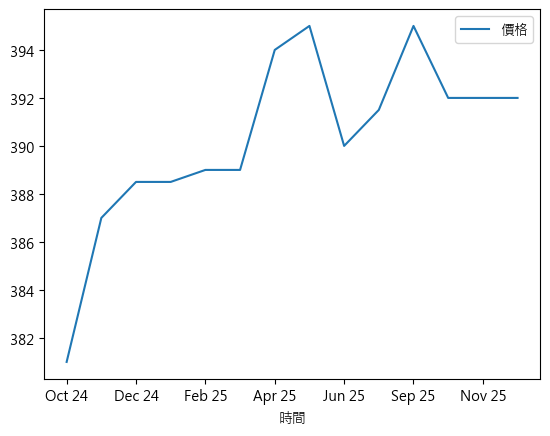

In [21]:
results.plot()

In [4]:
# driver.get('https://www.lme.com/Metals/Ferrous/LME-Steel-Scrap-CFR-Turkey-Platts#Volume+and+open+interest')
output = driver.find_elements(By.XPATH, '//*[@id="dataset-tab-2"]/div/div[2]/div[2]/div/div/div[1]/table/tbody')[0].text.split()
results_activity = []
for i in range(0,len(output),4):
    price_time = f'{output[i+0]} {output[i+1]}'
    volume = output[i+2]
    uncover = output[i+3]
    results_activity.append({'時間':price_time, '交易量':volume, '未平倉量': uncover})
results_activity = pd.DataFrame(results_activity)
results_activity.index = results_activity['時間']
results_activity['交易量'] = results_activity['交易量'].astype(float)
results_activity['未平倉量'] = results_activity['未平倉量'].astype(float)
del results_activity['時間']

ValueError: could not convert string to float: 'N/A'

In [8]:
'N/A' not in results_activity['未平倉量'].values

False

In [7]:
results_activity['交易量'].values

array(['N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A',
       'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A'], dtype=object)

<Axes: xlabel='時間'>

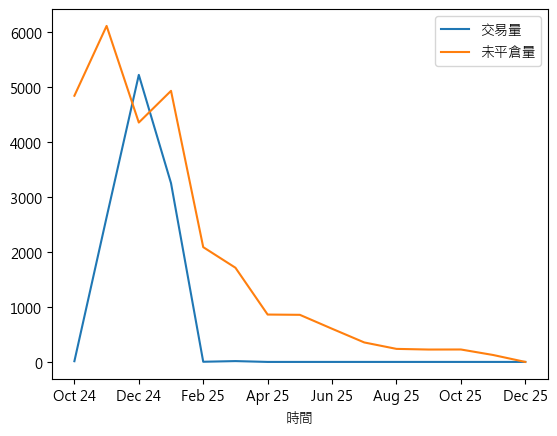

In [32]:
results_activity.plot()

In [38]:
output = pd.concat([results, results_activity], axis = 1)
pd.DataFrame(output).to_excel(f'9_交易活動_廢鋼.xlsx')